In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [186]:
# loading the Dataset.
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [187]:
# first will drop the unwanted columns.
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [188]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [189]:
# checking the null value
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [190]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


The given observation is a pandas DataFrame with 200 rows and 4 columns. Here's a breakdown of the information provided:

- Column 0: "TV" - This column represents the amount spent on TV advertising. It contains 200 non-null float64 values.
- Column 1: "Radio" - This column represents the amount spent on radio advertising. It also contains 200 non-null float64 values.
- Column 2: "Newspaper" - This column represents the amount spent on newspaper advertising. It also contains 200 non-null float64 values.
- Column 3: "Sales" - This column represents the sales generated. It contains 200 non-null float64 values.

The "non-null count" indicates that there are no missing values in any of the columns. The "Dtype" for all columns is float64, indicating that the values in each column are floating-point numbers.

Based on the information provided, it appears that this DataFrame contains data related to advertising expenses across different mediums (TV, radio, and newspaper) and the corresponding sales figures. This data could potentially be used to explore the relationship between advertising expenses and sales, and possibly build regression models to predict sales based on the advertising expenditure.

In [191]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


The given observation presents a correlation matrix that shows the correlation coefficients between different variables: TV, Radio, Newspaper, and Sales. Each cell in the matrix represents the correlation coefficient between two variables.

The correlation coefficients indicate the strength and direction of the linear relationship between the variables. Here's an explanation of the observation:

- TV and Sales: The correlation coefficient between TV advertising expenses and sales is 0.782224, indicating a strong positive correlation. This suggests that as TV advertising expenses increase, sales tend to increase as well.

- Radio and Sales: The correlation coefficient between radio advertising expenses and sales is 0.576223, indicating a moderate positive correlation. This suggests that there is a positive relationship between radio advertising expenses and sales, but it is not as strong as the relationship with TV advertising.

- Newspaper and Sales: The correlation coefficient between newspaper advertising expenses and sales is 0.228299, indicating a weak positive correlation. This suggests a relatively weak relationship between newspaper advertising expenses and sales.

To check for multicollinearity, we need to examine the correlation between the independent variables (TV, Radio, and Newspaper). High correlation between independent variables can indicate multicollinearity, which can affect the reliability of regression models. Let's check the correlation coefficients between the independent variables:

- TV and Radio: The correlation coefficient between TV and Radio is 0.054809, indicating a weak positive correlation. This suggests that there is little correlation between TV and radio advertising expenses.

- TV and Newspaper: The correlation coefficient between TV and Newspaper is 0.056648, indicating a weak positive correlation. This suggests little correlation between TV and newspaper advertising expenses.

- Radio and Newspaper: The correlation coefficient between Radio and Newspaper is 0.354104, indicating a moderate positive correlation. This suggests some level of correlation between radio and newspaper advertising expenses.

Based on the correlation coefficients, there is no significant multicollinearity issue among the independent variables. The correlation coefficients between TV, Radio, and Newspaper are relatively low, indicating that they are not strongly correlated with each other. However, it's important to note that correlation coefficients only capture linear relationships, and there may be other forms of relationships or interactions between the variables that are not captured by these coefficients.

In [192]:
#  checking the skewness
from scipy.stats import skew

TV : -0.06932836662244649
Mean: 147.0425
Median: 149.75
Mode: 17.2


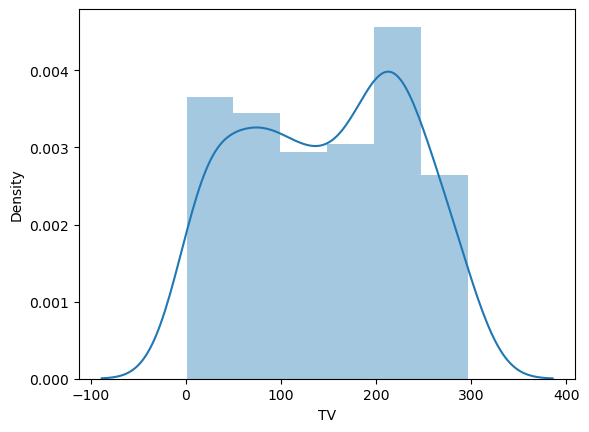

Radio : 0.0934668451108453
Mean: 23.264000000000006
Median: 22.9
Mode: 4.1


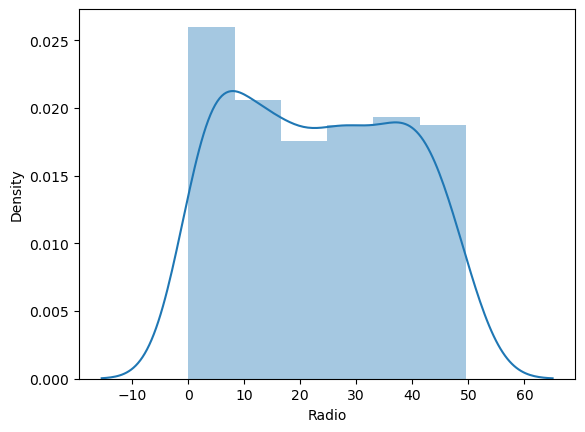

Newspaper : 0.8879959753085498
Mean: 30.553999999999995
Median: 25.75
Mode: 8.7


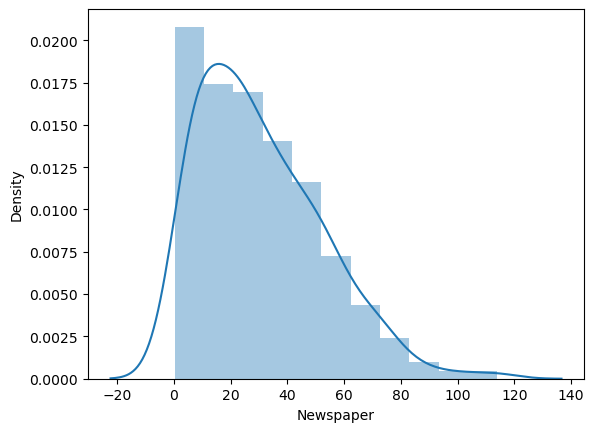

Sales : 0.4045082487061191
Mean: 14.0225
Median: 12.9
Mode: 9.7


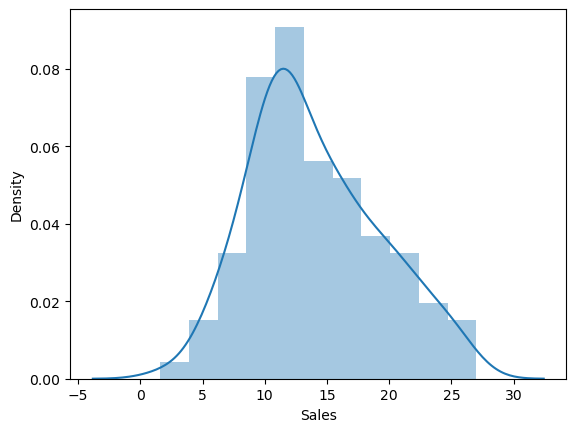

In [193]:
for col in df.columns:
    print(f'{col} : {skew(df[col])}')
    print(f'Mean: {df[col].mean()}')
    print(f'Median: {df[col].median()}')
    print(f'Mode: {df[col].mode()[0]}')
    sns.distplot(df[col])
    plt.show()

In [194]:
for col in df.columns:
    print(f'{col} : {skew(df[col])}')


TV : -0.06932836662244649
Radio : 0.0934668451108453
Newspaper : 0.8879959753085498
Sales : 0.4045082487061191


In [195]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


    #In the case of Newspaper,
    #Skewness value is not close to Zero and Correlation value is not close to One.

In [196]:
skew(df['Newspaper'])

0.8879959753085498

In [197]:
df['Newspaper'].head()

0    69.2
1    45.1
2    69.3
3    58.5
4    58.4
Name: Newspaper, dtype: float64

In [198]:
np.log(69.2)

4.237000862623624

In [199]:
np.log(45.1)

3.8088822465086327

In [200]:
np.log(df['Newspaper']).head()

0    4.237001
1    3.808882
2    4.238445
3    4.069027
4    4.067316
Name: Newspaper, dtype: float64

In [201]:
np.sqrt(df['Newspaper'])

0      8.318654
1      6.715653
2      8.324662
3      7.648529
4      7.641989
         ...   
195    3.714835
196    2.846050
197    2.529822
198    8.136338
199    2.949576
Name: Newspaper, Length: 200, dtype: float64

In [202]:
skew(df['Newspaper'])

0.8879959753085498

In [203]:
skew(np.sqrt(df['Newspaper']))

0.061918832707862255

In [204]:
skew(np.log(df['Newspaper']))

-1.1723613758648055

In [205]:
# lets remove the skew value of Newpapaer Using sqrt
df['Newspaper'] = np.sqrt(df['Newspaper'])
skew(df['Newspaper'])

0.061918832707862255

<Axes: xlabel='Newspaper', ylabel='Density'>

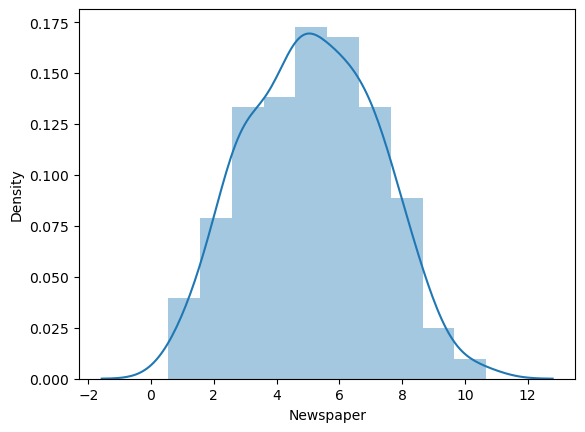

In [206]:
sns.distplot(df['Newspaper'])

In [207]:
df['Newspaper'].mean()

5.139871756730105

In [208]:
df['Newspaper'].median()

5.074424258134598

In [209]:
df.Newspaper.mode()[0]

2.949576240750525

In [210]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,8.318654,22.1
1,44.5,39.3,6.715653,10.4
2,17.2,45.9,8.324662,9.3
3,151.5,41.3,7.648529,18.5
4,180.8,10.8,7.641989,12.9


### Data Visulaization

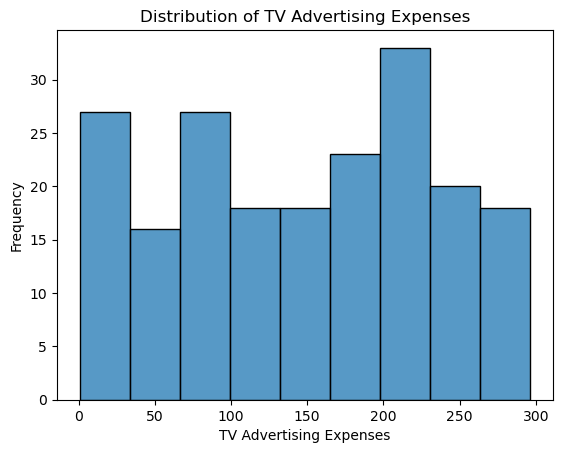

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of TV advertising expenses
sns.histplot(data=df, x='TV')
plt.xlabel('TV Advertising Expenses')
plt.ylabel('Frequency')
plt.title('Distribution of TV Advertising Expenses')
plt.show()

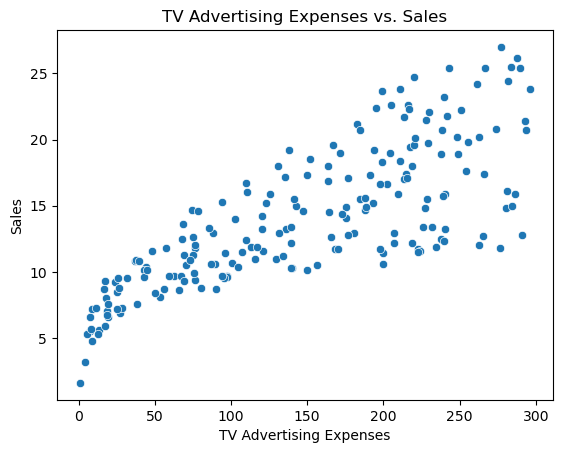

In [212]:
# Scatter plot of TV advertising expenses vs. Sales
sns.scatterplot(data=df, x='TV', y='Sales')
plt.xlabel('TV Advertising Expenses')
plt.ylabel('Sales')
plt.title('TV Advertising Expenses vs. Sales')
plt.show()

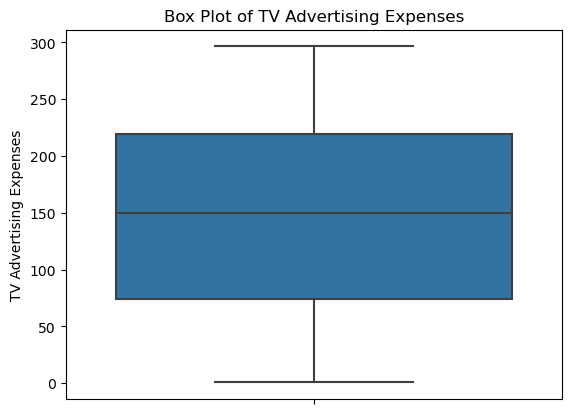

In [213]:
# Box plot of TV advertising expenses
sns.boxplot(data=df, y='TV')
plt.ylabel('TV Advertising Expenses')
plt.title('Box Plot of TV Advertising Expenses')
plt.show()

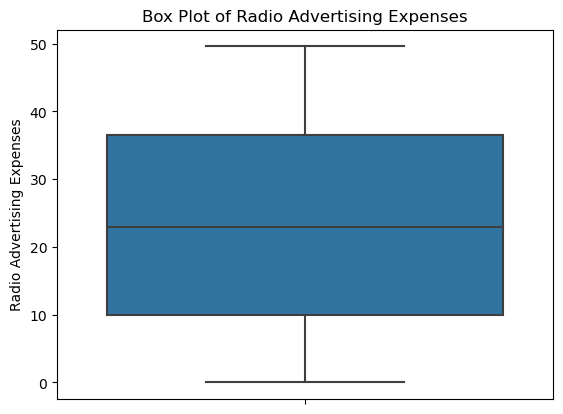

In [214]:
# Box plot of TV advertising expenses
sns.boxplot(data=df, y='Radio')
plt.ylabel('Radio Advertising Expenses')
plt.title('Box Plot of Radio Advertising Expenses')
plt.show()

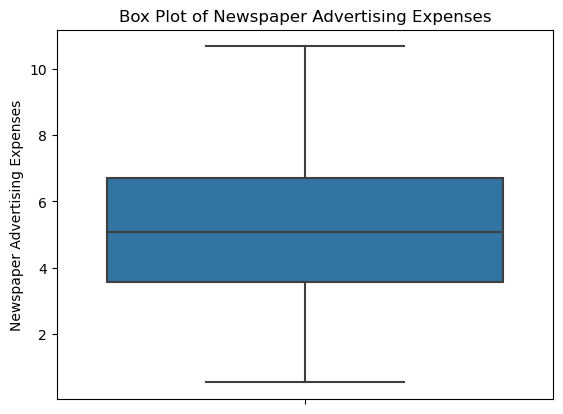

In [215]:
# Box plot of TV advertising expenses
sns.boxplot(data=df, y='Newspaper')
plt.ylabel('Newspaper Advertising Expenses')
plt.title('Box Plot of Newspaper Advertising Expenses')
plt.show()

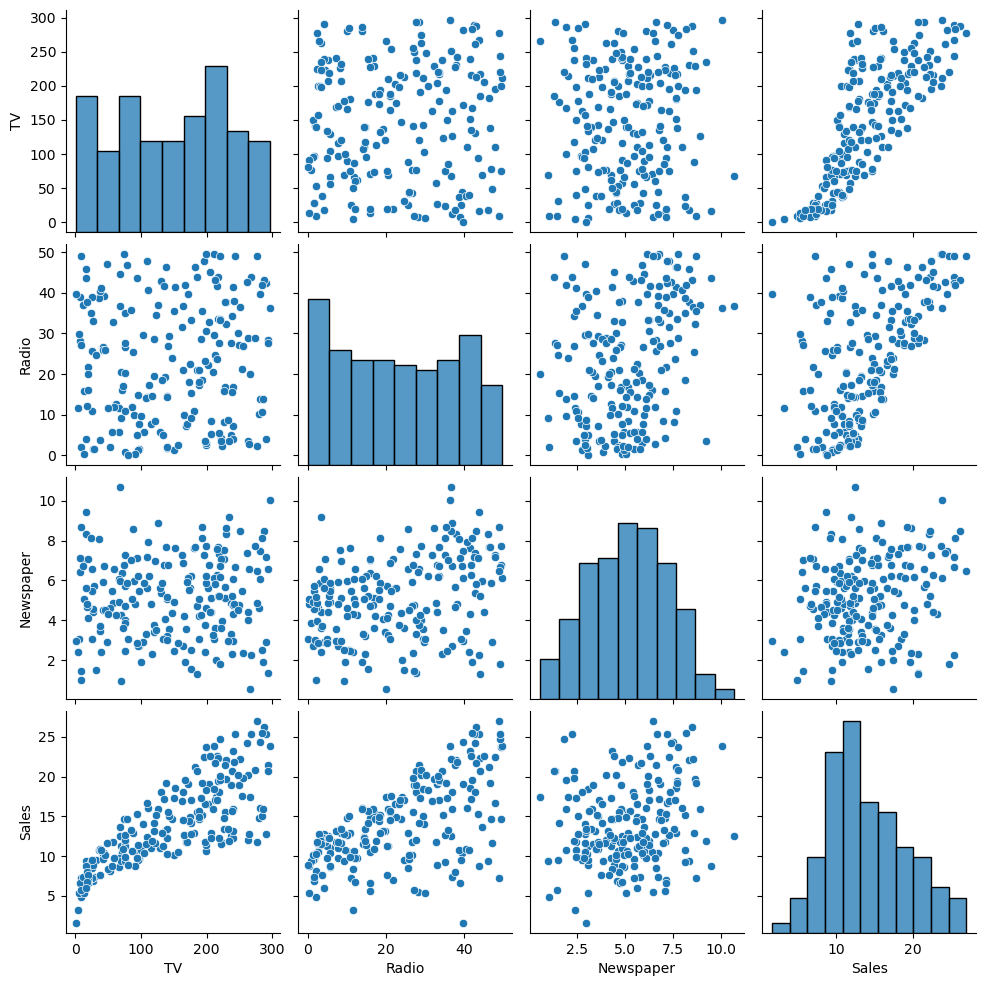

In [216]:
# Scatter plot matrix
sns.pairplot(data=df)
plt.show()

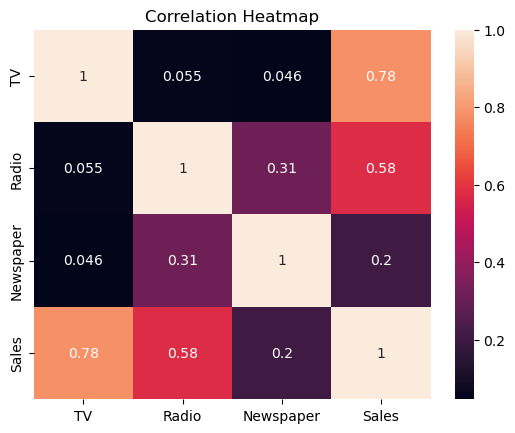

In [217]:
# Heatmap of correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

    # Here from the above observation what we can see that there is multicolinearity between Radio and Newpaper.
    
    # And whenever there is Multi collinearity within the input feature we drop the column, here, in this case, 'Newspaper' column will be dropped.

In [218]:
df.drop(columns='Newspaper',axis=1,inplace=True)

In [219]:
df.describe()

,TV,Radio,Sales
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,14.022500
std,85.854236,14.846809,5.217457
min,0.700000,0.000000,1.600000
25%,74.375000,9.975000,10.375000
50%,149.750000,22.900000,12.900000
75%,218.825000,36.525000,17.400000
max,296.400000,49.600000,27.000000


In [220]:
df.head()

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9


#### Split X and Y

In [221]:
x = df.iloc[:,:-1]

In [222]:
x

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [223]:
y = df.iloc[:,-1]

In [224]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

#### Train Test Split

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size=0.8,random_state=1)

### Applying Machine Learning Regression Algorithms 

In [227]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import ElasticNet

In [228]:
# import evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [229]:
# create a function to apply all the algorithm.

def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    print(f"Training Result :- {train*100}")
    print(f"Testing Result :- {test*100}")
    
    mae = mean_absolute_error(ytest,ypred) # mean absolute error
    mse = mean_squared_error(ytest,ypred) # mean squared error
    rmse = np.sqrt(mse) # root mean squared error
    r2 = r2_score(ytest,ypred) # Accuracy
    print(f"MAE :- {mae}\nMSE:- {mse}\nRMSE :- {rmse}\nACCURACY:- {r2*100}")
#     return model

In [230]:
reg = LinearRegression()
mymodel(reg)

Training Result :- 89.585284687766
Testing Result :- 89.47344950027068
MAE :- 1.0209003282677902
MSE:- 1.9552218850113185
RMSE :- 1.3982924890777746
ACCURACY:- 89.47344950027068


In [231]:
reg.intercept_

2.947515036029003

In [232]:
reg.coef_

array([0.04686997, 0.1800065 ])

In [233]:
reg.feature_names_in_

array(['TV', 'Radio'], dtype=object)

In [234]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [235]:
reg.singular_

array([1105.30563656,  191.59052748])

In [236]:
reg = DecisionTreeRegressor()
mymodel(reg)

Training Result :- 100.0
Testing Result :- 97.45480204221516
MAE :- 0.5225000000000002
MSE:- 0.4727500000000001
RMSE :- 0.6875681784376005
ACCURACY:- 97.45480204221516


In [237]:
reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [238]:
reg.tree_

In [239]:
reg = RandomForestRegressor()
mymodel(reg)

Training Result :- 99.73176685744937
Testing Result :- 98.55975928968654
MAE :- 0.4325499999999991
MSE:- 0.26751309999999817
RMSE :- 0.5172166857323903
ACCURACY:- 98.55975928968654


In [240]:
reg = xgb.XGBRegressor()
mymodel(reg)

Training Result :- 99.99983733317039
Testing Result :- 97.6682032925219
MAE :- 0.5186453700065614
MSE:- 0.433112438303105
RMSE :- 0.6581127853970814
ACCURACY:- 97.6682032925219


In [241]:
reg = SVR(kernel='linear')
mymodel(reg)

Training Result :- 88.90667960582945
Testing Result :- 90.70172702685618
MAE :- 0.956160836868235
MSE:- 1.7270792374356183
RMSE :- 1.314183867438502
ACCURACY:- 90.70172702685618


In [242]:
reg = KNeighborsRegressor()
mymodel(reg)

Training Result :- 97.49799920976264
Testing Result :- 95.59749396928736
MAE :- 0.6954999999999998
MSE:- 0.8177299999999998
RMSE :- 0.9042842473470385
ACCURACY:- 95.59749396928736


In [243]:
reg = GaussianProcessRegressor()
mymodel(reg)

Training Result :- 100.0
Testing Result :- -1056.0343208239838
MAE :- 13.673452886655099
MSE:- 214.72405456634334
RMSE :- 14.653465616240526
ACCURACY:- -1056.0343208239838


In [244]:
reg = ElasticNet()
mymodel(reg)

Training Result :- 89.58007363382985
Testing Result :- 89.25314108231245
MAE :- 1.0318387203899635
MSE:- 1.9961423974104378
RMSE :- 1.4128490356051624
ACCURACY:- 89.25314108231245


In [245]:
reg = ElasticNet(alpha=0.5, l1_ratio=0.5)
mymodel(reg)

Training Result :- 89.58397919172688
Testing Result :- 89.36463661434917
MAE :- 1.0263765814203354
MSE:- 1.975433001267346
RMSE :- 1.4055009787500492
ACCURACY:- 89.36463661434917


In [246]:
from sklearn.linear_model import Ridge,Lasso
for i in range(1,50):
    l2 = Ridge(alpha=i)
    l2.fit(xtrain,ytrain)
    
    train = l2.score(xtrain,ytrain)
    test = l2.score(xtest,ytest)
    
    print(f"{i} {train} {test}")

1 0.8958528466883332 0.8947299792107996
2 0.8958528461203937 0.89472546322595
3 0.8958528451739034 0.8947209470482108
4 0.8958528438489238 0.8947164306776346
5 0.895852842145517 0.8947119141142741
6 0.8958528400637443 0.8947073973581819
7 0.8958528376036679 0.8947028804094105
8 0.8958528347653489 0.8946983632680126
9 0.8958528315488494 0.8946938459340407
10 0.895852827954231 0.8946893284075477
11 0.8958528239815554 0.8946848106885856
12 0.8958528196308841 0.8946802927772074
13 0.8958528149022789 0.8946757746734656
14 0.8958528097958013 0.8946712563774126
15 0.895852804311513 0.8946667378891011
16 0.8958527984494756 0.8946622192085836
17 0.8958527922097508 0.8946577003359123
18 0.8958527855924 0.8946531812711401
19 0.895852778597485 0.8946486620143193
20 0.8958527712250672 0.8946441425655025
21 0.8958527634752083 0.894639622924742
22 0.8958527553479697 0.8946351030920903
23 0.895852746843413 0.8946305830676001
24 0.8958527379615998 0.8946260628513235
25 0.8958527287025917 0.894621542443

In [247]:
from sklearn.linear_model import Ridge,Lasso
for i in range(1,50):
    l1 = Lasso(alpha=i)
    l1.fit(xtrain,ytrain)
    
    train = l1.score(xtrain,ytrain)
    test = l1.score(xtest,ytest)
    
    print(f"{i} {train} {test}")

1 0.8957019952025785 0.8909880092930791
2 0.8952494337259853 0.886897359920668
3 0.8944951624460401 0.8824621683523532
4 0.8934391813627428 0.8776824345881352
5 0.8920814904760933 0.8725581586280134
6 0.8904220897860919 0.8670893404719883
7 0.8884609792927384 0.8612759801200597
8 0.8861981589960327 0.8551180775722275
9 0.8836336288959751 0.8486156328284917
10 0.8807673889925652 0.8417686458888526
11 0.8775994392858034 0.8345771167533098
12 0.8741297797756895 0.8270410454218636
13 0.8703584104622234 0.8191604318945138
14 0.8662853313454053 0.8109352761712605
15 0.8619105424252352 0.8023655782521038
16 0.857234043701713 0.7934513381370436
17 0.8522558351748387 0.7841925558260798
18 0.8469759168446123 0.7745892313192123
19 0.8413942887110337 0.7646413646164416
20 0.8355109507741032 0.7543489557177674
21 0.8293259030338207 0.7437120046231896
22 0.822839145490186 0.7327305113327083
23 0.8160506781431992 0.7214044758463234
24 0.8089605009928604 0.7097338981640351
25 0.8015686140391693 0.6977

In [248]:
# let check by scaling the input features
from sklearn.preprocessing import StandardScaler

In [249]:
ss = StandardScaler()

In [250]:
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

### Applying Machine Learning Regression Algorithms after Scaling.

In [251]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import ElasticNet

In [252]:
# import evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [253]:
# create a function to apply all the algorithm.

def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    print(f"Training Result :- {train*100}")
    print(f"Testing Result :- {test*100}")
    
    mae = mean_absolute_error(ytest,ypred) # mean absolute error
    mse = mean_squared_error(ytest,ypred) # mean squared error
    rmse = np.sqrt(mse) # root mean squared error
    r2 = r2_score(ytest,ypred) # Accuracy
    print(f"MAE :- {mae}\nMSE:- {mse}\nRMSE :- {rmse}\nACCURACY:- {r2*100}")
#     return model

In [254]:
reg = LinearRegression()
mymodel(reg)

Training Result :- 89.585284687766
Testing Result :- 89.47344950027066
MAE :- 1.0209003282677904
MSE:- 1.9552218850113203
RMSE :- 1.3982924890777753
ACCURACY:- 89.47344950027066


In [255]:
reg.intercept_

13.811250000000001

In [256]:
reg.coef_

array([4.09521919, 2.73481621])

In [257]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [258]:
reg.singular_

array([13.12610024, 12.15341484])

In [259]:
reg = DecisionTreeRegressor()
mymodel(reg)

Training Result :- 100.0
Testing Result :- 96.58935397936183
MAE :- 0.5500000000000002
MSE:- 0.6335000000000001
RMSE :- 0.7959271323431562
ACCURACY:- 96.58935397936183


In [260]:
reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [261]:
reg.tree_

In [262]:
reg = RandomForestRegressor()
mymodel(reg)

Training Result :- 99.69522503574582
Testing Result :- 98.38984047423325
MAE :- 0.4606499999999987
MSE:- 0.29907414999999854
RMSE :- 0.5468767228544277
ACCURACY:- 98.38984047423325


In [263]:
reg = xgb.XGBRegressor()
mymodel(reg)

Training Result :- 99.99983733317039
Testing Result :- 97.66729478037321
MAE :- 0.5202042937278748
MSE:- 0.4332811871098414
RMSE :- 0.658240979512702
ACCURACY:- 97.66729478037321


In [264]:
reg = SVR(kernel='linear')
mymodel(reg)

Training Result :- 88.83174343379835
Testing Result :- 90.5174992955503
MAE :- 0.9633341529496725
MSE:- 1.7612980531896028
RMSE :- 1.327139048174532
ACCURACY:- 90.5174992955503


In [265]:
reg = KNeighborsRegressor()
mymodel(reg)

Training Result :- 98.35018359194088
Testing Result :- 99.12033866880495
MAE :- 0.31650000000000017
MSE:- 0.1633900000000001
RMSE :- 0.4042152891715009
ACCURACY:- 99.12033866880495


In [266]:
reg = GaussianProcessRegressor()
mymodel(reg)

Training Result :- 99.874355240035
Testing Result :- 88.45003513522663
MAE :- 0.5978841798007488
MSE:- 2.1453128520399334
RMSE :- 1.4646886536188957
ACCURACY:- 88.45003513522663


In [267]:
reg = ElasticNet()
mymodel(reg)

Training Result :- 74.66179008263796
Testing Result :- 73.9694908707566
MAE :- 1.6875448980443366
MSE:- 4.834957199777106
RMSE :- 2.198853610356339
ACCURACY:- 73.9694908707566


In [268]:
reg = ElasticNet(alpha=0.5, l1_ratio=0.5)
mymodel(reg)

Training Result :- 84.31064498760772
Testing Result :- 84.22174011636831
MAE :- 1.265271356841462
MSE:- 2.9306845611642736
RMSE :- 1.71192422763517
ACCURACY:- 84.22174011636831


In [269]:
from sklearn.linear_model import Ridge,Lasso
for i in range(1,50):
    l2 = Ridge(alpha=i)
    l2.fit(xtrain,ytrain)
    
    train = l2.score(xtrain,ytrain)
    test = l2.score(xtest,ytest)
    
    print(f"{i} {train} {test}")

1 0.8958226646105728 0.8949469374820359
2 0.8957335091641688 0.8950903866462724
3 0.8955874137041937 0.8951671822440685
4 0.8953863417615385 0.8951795840625996
5 0.8951321898690918 0.895129774960944
6 0.8948267900867624 0.895019863774342
7 0.8944719124199652 0.8948518880954631
8 0.8940692671365795 0.8946278169385057
9 0.893620506987135 0.8943495532916301
10 0.8931272293327277 0.8940189365629572
11 0.8925909781849404 0.8936377449250769
12 0.8920132461618235 0.8932076975627717
13 0.8913954763637827 0.8927304568284065
14 0.8907390641730248 0.8922076303092167
15 0.8900453589800343 0.89164077281051
16 0.8893156658403711 0.8910313882585933
17 0.8885512470649226 0.8903809315270466
18 0.8877533237465814 0.8896908101897855
19 0.886923077226181 0.8889623862041791
20 0.8860616505003726 0.8881969775273361
21 0.8851701495740049 0.8873958596685083
22 0.884249644759437 0.886560267180429
23 0.8833011719250995 0.8856913950922556
24 0.8823257336955087 0.8847904002866621
25 0.881324300604829 0.8838584028

In [270]:
from sklearn.linear_model import Ridge,Lasso
for i in range(1,50):
    l1 = Lasso(alpha=i)
    l1.fit(xtrain,ytrain)
    
    train = l1.score(xtrain,ytrain)
    test = l1.score(xtest,ytest)
    
    print(f"{i} {train} {test}")

1 0.8317875489134674 0.8148105888749102
2 0.6395916495109448 0.5977590184417715
3 0.32894094045631506 0.2565864687967063
4 0.08748251865335266 0.02746073975842922
5 0.0 -0.06006527537702655
6 0.0 -0.06006527537702655
7 0.0 -0.06006527537702655
8 0.0 -0.06006527537702655
9 0.0 -0.06006527537702655
10 0.0 -0.06006527537702655
11 0.0 -0.06006527537702655
12 0.0 -0.06006527537702655
13 0.0 -0.06006527537702655
14 0.0 -0.06006527537702655
15 0.0 -0.06006527537702655
16 0.0 -0.06006527537702655
17 0.0 -0.06006527537702655
18 0.0 -0.06006527537702655
19 0.0 -0.06006527537702655
20 0.0 -0.06006527537702655
21 0.0 -0.06006527537702655
22 0.0 -0.06006527537702655
23 0.0 -0.06006527537702655
24 0.0 -0.06006527537702655
25 0.0 -0.06006527537702655
26 0.0 -0.06006527537702655
27 0.0 -0.06006527537702655
28 0.0 -0.06006527537702655
29 0.0 -0.06006527537702655
30 0.0 -0.06006527537702655
31 0.0 -0.06006527537702655
32 0.0 -0.06006527537702655
33 0.0 -0.06006527537702655
34 0.0 -0.06006527537702655
35

### Forecasting 

In [271]:
# def pred():
#     l1 = []
#     for i in df.columns[:-1]:
#         val = eval(input(f"enter {i} value:-  "))
#         l1.append(val)
#     v = linreg.predict([l1])[0]
#     print(f'The sales would be approx {round(v,2)} USD Dollar for the above given parameter.')

#### Appliying Polynomial features.

To perform polynomial feature transformation on the 'TV' and 'Radio' columns with a degree of 2, you can use the `PolynomialFeatures` class from scikit-learn. Here's an example of how you can do it:

```python
from sklearn.preprocessing import PolynomialFeatures

# Select the 'TV' and 'Radio' columns from your DataFrame
X = df[['TV', 'Radio']]

# Create an instance of PolynomialFeatures with degree 2
poly_features = PolynomialFeatures(degree=2)

# Transform the selected columns to polynomial features
X_poly = poly_features.fit_transform(X)

# The transformed data is now stored in X_poly as a new array of polynomial features
```

In the code above, replace `df` with the actual name of your DataFrame containing the 'TV' and 'Radio' columns. After performing the polynomial feature transformation, the resulting polynomial features will be stored in the `X_poly` variable. You can use this transformed data for further analysis or as input for regression models.

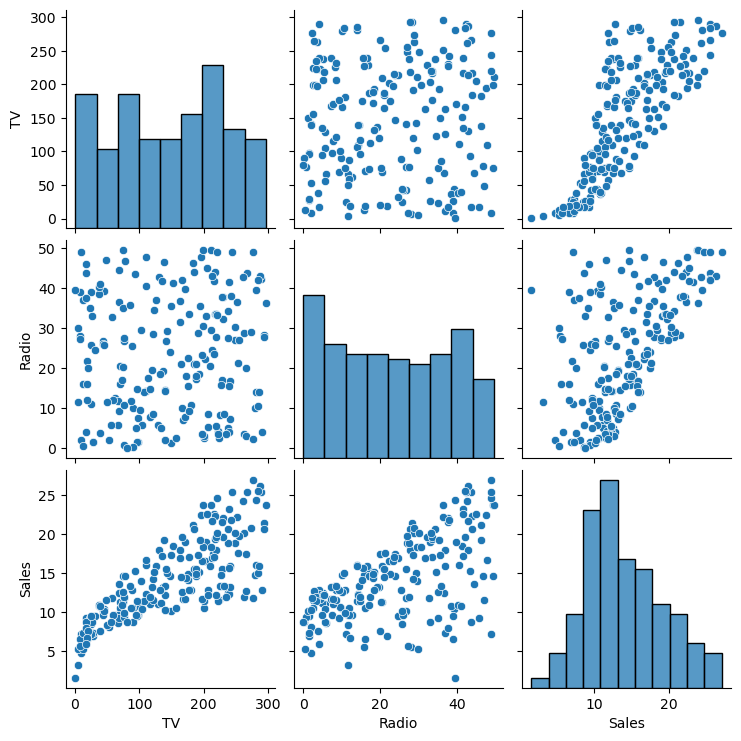

In [272]:
sns.pairplot(df)

In [273]:
df

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,9.7
197,177.0,9.3,12.8
198,283.6,42.0,25.5


In [274]:
from sklearn.preprocessing import PolynomialFeatures

# Select the 'TV' and 'Radio' columns from your DataFrame
X = df[['TV', 'Radio']]

# Create an instance of PolynomialFeatures with degree 2
poly_features = PolynomialFeatures(degree=2)

# Transform the selected columns to polynomial features
X_poly = poly_features.fit_transform(X)

# The transformed data is now stored in X_poly as a new array of polynomial features

In [276]:
X_poly.shape

(200, 6)

In [279]:
# Separate x and y
x = X_poly
y = df.iloc[:,-1]

In [280]:
x

array([[1.000000e+00, 2.301000e+02, 3.780000e+01, 5.294601e+04,
        8.697780e+03, 1.428840e+03],
       [1.000000e+00, 4.450000e+01, 3.930000e+01, 1.980250e+03,
        1.748850e+03, 1.544490e+03],
       [1.000000e+00, 1.720000e+01, 4.590000e+01, 2.958400e+02,
        7.894800e+02, 2.106810e+03],
       ...,
       [1.000000e+00, 1.770000e+02, 9.300000e+00, 3.132900e+04,
        1.646100e+03, 8.649000e+01],
       [1.000000e+00, 2.836000e+02, 4.200000e+01, 8.042896e+04,
        1.191120e+04, 1.764000e+03],
       [1.000000e+00, 2.321000e+02, 8.600000e+00, 5.387041e+04,
        1.996060e+03, 7.396000e+01]])

In [281]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

#### train test split

In [282]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [283]:
xtrain

array([[1.000000e+00, 1.310000e+01, 4.000000e-01, 1.716100e+02,
        5.240000e+00, 1.600000e-01],
       [1.000000e+00, 9.040000e+01, 3.000000e-01, 8.172160e+03,
        2.712000e+01, 9.000000e-02],
       [1.000000e+00, 1.870000e+01, 1.210000e+01, 3.496900e+02,
        2.262700e+02, 1.464100e+02],
       [1.000000e+00, 2.041000e+02, 3.290000e+01, 4.165681e+04,
        6.714890e+03, 1.082410e+03],
       [1.000000e+00, 7.300000e+00, 2.810000e+01, 5.329000e+01,
        2.051300e+02, 7.896100e+02],
       [1.000000e+00, 1.473000e+02, 2.390000e+01, 2.169729e+04,
        3.520470e+03, 5.712100e+02],
       [1.000000e+00, 7.820000e+01, 4.680000e+01, 6.115240e+03,
        3.659760e+03, 2.190240e+03],
       [1.000000e+00, 2.280000e+02, 3.770000e+01, 5.198400e+04,
        8.595600e+03, 1.421290e+03],
       [1.000000e+00, 2.050000e+02, 4.510000e+01, 4.202500e+04,
        9.245500e+03, 2.034010e+03],
       [1.000000e+00, 2.295000e+02, 3.230000e+01, 5.267025e+04,
        7.412850e+03, 1.043

### Applying Machine Learning Regression Algorithms after setting the polynomial degree to 2.

In [284]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import ElasticNet

In [285]:
# import evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [286]:
# create a function to apply all the algorithm.

def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    print(f"Training Result :- {train*100}")
    print(f"Testing Result :- {test*100}")
    
    mae = mean_absolute_error(ytest,ypred) # mean absolute error
    mse = mean_squared_error(ytest,ypred) # mean squared error
    rmse = np.sqrt(mse) # root mean squared error
    r2 = r2_score(ytest,ypred) # Accuracy
    print(f"MAE :- {mae}\nMSE:- {mse}\nRMSE :- {rmse}\nACCURACY:- {r2*100}")
#     return model

In [287]:
reg = LinearRegression()
mymodel(reg)

Training Result :- 98.51540427988628
Testing Result :- 98.9966861730198
MAE :- 0.33912992719497803
MSE:- 0.1863574541438428
RMSE :- 0.43169138761833414
ACCURACY:- 98.9966861730198


In [288]:
reg.intercept_

5.090191969692864

In [289]:
reg.coef_

array([ 0.        ,  0.05319888,  0.02165258, -0.00011716,  0.00108352,
        0.00027163])

In [291]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [292]:
reg.singular_

array([3.27552970e+05, 3.24237212e+04, 5.40557182e+03, 2.61483966e+02,
       4.58146159e+01, 0.00000000e+00])

In [293]:
reg = DecisionTreeRegressor()
mymodel(reg)

Training Result :- 100.0
Testing Result :- 98.38485587025816
MAE :- 0.37500000000000033
MSE:- 0.30000000000000016
RMSE :- 0.5477225575051663
ACCURACY:- 98.38485587025816


In [294]:
reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [295]:
reg.tree_

In [296]:
reg = RandomForestRegressor()
mymodel(reg)

Training Result :- 99.86272735156383
Testing Result :- 99.46836440747259
MAE :- 0.24652500000000063
MSE:- 0.09874702500000028
RMSE :- 0.3142403936479209
ACCURACY:- 99.46836440747259


In [297]:
reg = xgb.XGBRegressor()
mymodel(reg)

Training Result :- 99.99995379522566
Testing Result :- 98.9826916377547
MAE :- 0.31523608684539817
MSE:- 0.18895682623839383
RMSE :- 0.4346916450064273
ACCURACY:- 98.9826916377547


In [299]:
reg = SVR(kernel='poly')
mymodel(reg)

Training Result :- 56.64695907095254
Testing Result :- 52.17174211013996
MAE :- 2.3432236685804684
MSE:- 8.883713287712265
RMSE :- 2.9805558689130898
ACCURACY:- 52.17174211013996


In [300]:
reg = KNeighborsRegressor()
mymodel(reg)

Training Result :- 95.44736182151058
Testing Result :- 90.80363851593827
MAE :- 0.9285
MSE:- 1.7081500000000005
RMSE :- 1.306962126459677
ACCURACY:- 90.80363851593827


In [301]:
reg = GaussianProcessRegressor()
mymodel(reg)

Training Result :- 100.0
Testing Result :- -1190.0519571677237
MAE :- 14.867500000000001
MSE:- 239.61675
RMSE :- 15.479559102248357
ACCURACY:- -1190.0519571677237


In [302]:
reg = ElasticNet()
mymodel(reg)

Training Result :- 98.49174262915064
Testing Result :- 98.95429948278942
MAE :- 0.3384701750941819
MSE:- 0.19423044011144502
RMSE :- 0.4407158269355039
ACCURACY:- 98.95429948278942


In [303]:
reg = ElasticNet(alpha=0.5, l1_ratio=0.5)
mymodel(reg)

Training Result :- 98.49809526246366
Testing Result :- 98.93760863424339
MAE :- 0.3428376465791235
MSE:- 0.19733063065890477
RMSE :- 0.4442191245983279
ACCURACY:- 98.93760863424339


In [304]:
from sklearn.linear_model import Ridge,Lasso
for i in range(1,50):
    l2 = Ridge(alpha=i)
    l2.fit(xtrain,ytrain)
    
    train = l2.score(xtrain,ytrain)
    test = l2.score(xtest,ytest)
    
    print(f"{i} {train} {test}")

1 0.9851540427362384 0.9899668651881043
2 0.9851540425485713 0.9899668688430191
3 0.9851540422361699 0.9899668726948259
4 0.985154041799342 0.9899668767434054
5 0.9851540412383943 0.9899668809886393
6 0.985154040553633 0.9899668854304084
7 0.9851540397453628 0.9899668900685938
8 0.9851540388138881 0.9899668949030762
9 0.9851540377595123 0.9899668999337362
10 0.9851540365825376 0.989966905160454
11 0.985154035283266 0.9899669105831104
12 0.9851540338619978 0.9899669162015851
13 0.9851540323190334 0.9899669220157581
14 0.9851540306546716 0.9899669280255096
15 0.9851540288692106 0.9899669342307189
16 0.9851540269629478 0.9899669406312661
17 0.9851540249361799 0.9899669472270303
18 0.9851540227892023 0.9899669540178907
19 0.98515402052231 0.9899669610037265
20 0.9851540181357973 0.9899669681844167
21 0.985154015629957 0.9899669755598406
22 0.9851540130050815 0.9899669831298765
23 0.9851540102614627 0.9899669908944031
24 0.9851540073993909 0.9899669988532989
25 0.9851540044191562 0.98996700

In [305]:
from sklearn.linear_model import Ridge,Lasso
for i in range(1,50):
    l1 = Lasso(alpha=i)
    l1.fit(xtrain,ytrain)
    
    train = l1.score(xtrain,ytrain)
    test = l1.score(xtest,ytest)
    
    print(f"{i} {train} {test}")

1 0.9848535534996194 0.9900609755448281
2 0.9845992311095132 0.9909925212650685
3 0.9841793742836423 0.9917494784042435
4 0.9835924712049936 0.9923340395210629
5 0.9828406124775831 0.9927442323385488
6 0.9819228680333477 0.9929811318669929
7 0.9808392444473486 0.9930447116103674
8 0.9795879978091505 0.9929346677324669
9 0.9781725729245149 0.9926514054817545
10 0.9765894312772401 0.9921942109388282
11 0.9748423876241651 0.9915642526750559
12 0.9729276968425229 0.9907602042397976
13 0.9708474039123476 0.9897828296333604
14 0.9686017554479711 0.9886323140605292
15 0.9663424370406193 0.9873705911520367
16 0.9641229272833514 0.9860193466168757
17 0.961760253916048 0.9845013193737259
18 0.9595488697438948 0.9830323814736488
19 0.9569668157344842 0.9812378464168242
20 0.9541528031280901 0.9792347636088193
21 0.950991024869861 0.9770022794979155
22 0.9476757788319825 0.9746038489578156
23 0.9442083312026868 0.9720404233860755
24 0.9438632995410086 0.9717585758751459
25 0.9438501225357494 0.971